In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/home_depot_data_1_2021_12.csv")

In [3]:
df.head()

,index,url,title,images,description,product_id,sku,gtin13,brand,price,currency,availability,uniq_id,scraped_at
0,0,https://www.homedepot.com/p/Carhartt-Men-s-3X-...,Men's 3X Large Carbon Heather Cotton/Polyester...,https://images.thdstatic.com/productImages/a7c...,"This heavyweight, water-repellent hooded sweat...",310090686,1.004455e+09,8.868595e+11,Carhartt,64.99,USD,InStock,ba6b9373-a145-5203-a7fe-5d9ede759dbb,2021-12-14 00:55:53.060268
1,1,https://www.homedepot.com/p/Turmode-30-ft-RP-T...,Turmode 30 ft. RP TNC Female to RP TNC Male Ad...,https://images.thdstatic.com/productImages/87a...,If you need more length between your existing ...,206724580,1.001661e+09,6.697163e+11,Unbranded,71.61,USD,InStock,70b7dd77-6474-5085-9afa-cda486a7237d,2021-12-14 00:55:53.070474
2,2,https://www.homedepot.com/p/Carolina-Pet-Compa...,Large Tapestry Bolster Bed,https://images.thdstatic.com/productImages/e6b...,Polyester cover resembling rich Italian tapest...,310347105,1.005202e+09,8.300001e+11,Carolina Pet Company,166.83,USD,InStock,8f573cae-947d-5262-8e51-b9381e8babeb,2021-12-14 00:55:53.677894
3,3,https://www.homedepot.com/p/16-Gauge-Sinks-Ves...,16-Gauge-Sinks Vessel Sink in White with Faucet,https://images.thdstatic.com/productImages/a6e...,It features a rectangle shape. This vessel set...,312338711,1.005103e+09,6.279872e+11,Unbranded,507.63,USD,InStock,3867081f-ea97-5855-8d6d-603b8e81f983,2021-12-14 00:55:53.987718
4,4,https://www.homedepot.com/p/Adtec-Men-s-Crazy-...,Men's Crazy Horse 9'' Logger Boot - Steel Toe ...,https://images.thdstatic.com/productImages/e7f...,This 9 in. black full grain leather logger boo...,308561619,1.004096e+09,6.477880e+11,Adtec,103.59,USD,InStock,e810513f-e5ed-598b-a17b-7ab60a1170fb,2021-12-14 00:55:54.003789


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2551 entries, 0 to 2550
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         2551 non-null   int64  
 1   url           2551 non-null   object 
 2   title         2551 non-null   object 
 3   images        2551 non-null   object 
 4   description   2551 non-null   object 
 5   product_id    2551 non-null   int64  
 6   sku           2407 non-null   float64
 7   gtin13        2170 non-null   float64
 8   brand         2551 non-null   object 
 9   price         2551 non-null   float64
 10  currency      2551 non-null   object 
 11  availability  2551 non-null   object 
 12  uniq_id       2551 non-null   object 
 13  scraped_at    2551 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 279.1+ KB


In [5]:
df.availability.value_counts()

availability
InStock    2551
Name: count, dtype: int64

In [6]:
df.availability.nunique()

1

We check the length of the text we'll be using for the search engine:

In [7]:
df['title_len'] = df.title.str.len()
df['description_len'] = df.description.str.len()

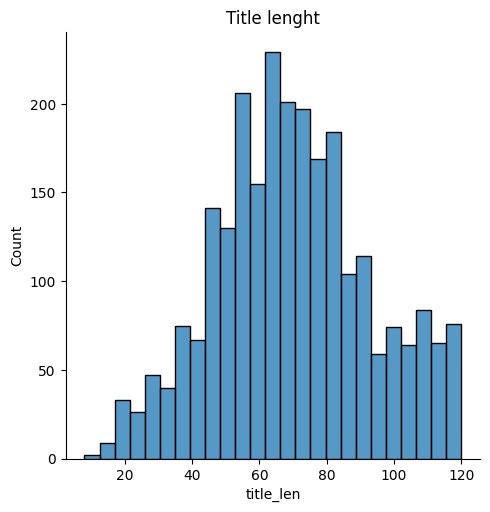

In [8]:
sns.displot(x='title_len', data=df)
plt.title("Title lenght");

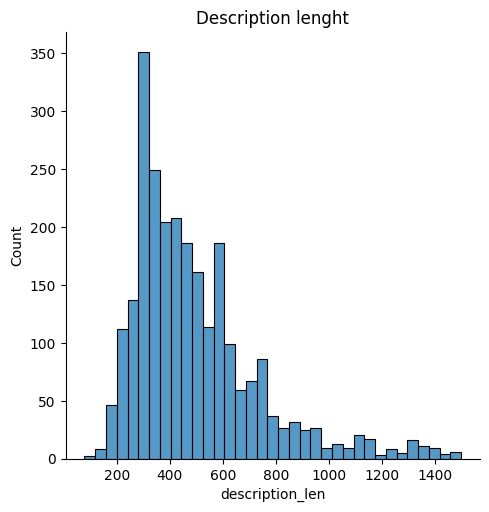

In [9]:
sns.displot(x='description_len', data=df)
plt.title("Description lenght");

We can use the features title, description, and brand for the search engine. 

### ETL for storing data in vectore database

In [10]:
df = pd.read_csv("../data/home_depot_data_1_2021_12.csv")

In [11]:
home_depot_data_cols = ['title', 'description', 'brand', 'price']

In [12]:
df = df[home_depot_data_cols]

In [13]:
df.head()

,title,description,brand,price
0,Men's 3X Large Carbon Heather Cotton/Polyester...,"This heavyweight, water-repellent hooded sweat...",Carhartt,64.99
1,Turmode 30 ft. RP TNC Female to RP TNC Male Ad...,If you need more length between your existing ...,Unbranded,71.61
2,Large Tapestry Bolster Bed,Polyester cover resembling rich Italian tapest...,Carolina Pet Company,166.83
3,16-Gauge-Sinks Vessel Sink in White with Faucet,It features a rectangle shape. This vessel set...,Unbranded,507.63
4,Men's Crazy Horse 9'' Logger Boot - Steel Toe ...,This 9 in. black full grain leather logger boo...,Adtec,103.59
